In [1]:
IMAGES_LOCATION = "/home/ekostrov/Documents/x_ray/train"
TEST_IMAGES = "/home/ekostrov/Documents/x_ray/test"
IMG_HEIGHT= 224
IMG_WIDTH = 224
BATCH_SIZE = 16

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path


import imageio
#import cv2
import skimage.transform

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, recall_score, accuracy_score

In [5]:
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD 
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
"""

'\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D\nfrom tensorflow.keras.layers import Dense, Dropout, Flatten\nfrom tensorflow.keras.models import Sequential, Model\nfrom tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint\nfrom tensorflow.keras.optimizers import Adam, SGD \nfrom tensorflow.keras import regularizers, optimizers\nfrom tensorflow.keras.applications import VGG19\nfrom tensorflow.keras.applications.vgg19 import preprocess_input\n'

In [7]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam, SGD 
from keras import regularizers, optimizers
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

ImportError: cannot import name 'tf2' from 'tensorflow.python' (unknown location)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
def img_class(cl):
    if np.round(cl[0]) == 1:
        return 0
    else:
        return 1 

In [7]:
def create_label(label):
    #print(label)
    return label
    if label == 'red':
        return 1
    else:
        return 0

In [8]:
plt.style.use('fivethirtyeight')
toy=False

In [11]:
files =[]
for r, d, f in os.walk(IMAGES_LOCATION):
    for file in f:
        files.append(os.path.join(r,file))

In [12]:
images = pd.DataFrame(files)
images.columns = ['path']
images['label'] = images.path.apply(lambda x:create_label(x.split('/')[-2]) )

In [13]:
images.shape

(5233, 2)

In [14]:
normal = images[images.label == 'NORMAL']

In [15]:
normal.head()

,path,label
3884,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
3885,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
3886,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
3887,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
3888,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL


In [16]:
len(normal)

1349

In [17]:
pnemonia = images[images.label =='PNEUMONIA']
pnemonia.head()
len(pnemonia)

3883

In [18]:
print(len(normal),len(pnemonia))

1349 3883


In [19]:
df = pd.concat([normal,pnemonia])
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,path,label
0,/home/ekostrov/Documents/x_ray/train/PNEUMONIA...,PNEUMONIA
1,/home/ekostrov/Documents/x_ray/train/PNEUMONIA...,PNEUMONIA
2,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
3,/home/ekostrov/Documents/x_ray/train/NORMAL/NO...,NORMAL
4,/home/ekostrov/Documents/x_ray/train/PNEUMONIA...,PNEUMONIA


(1476, 1908)


Text(0.5, 1.0, 'NORMAL')

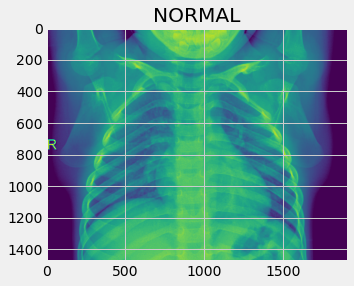

In [20]:
import matplotlib.image as mpimg
numb= np.random.randint(0,df.shape[0])
img = mpimg.imread(df.loc[numb]['path'])

print(img.shape)
plt.imshow(img)
plt.title(df.loc[numb]['label'])

In [21]:
df_train, df_test = train_test_split(df, random_state=42)
print(df_train.shape, df_test.shape)

(3924, 2) (1308, 2)


# CREATE TEST FILES FOR FINAL TESTING 

Text(0.5, 1.0, 'PNEUMONIA')

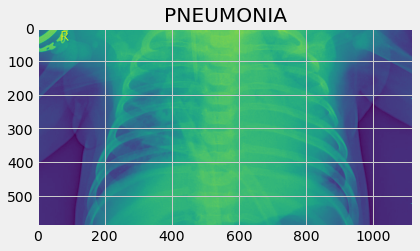

In [22]:
test_files =[]
for r, d, f in os.walk(TEST_IMAGES):
    for file in f:
        test_files.append(os.path.join(r,file))
test_images = pd.DataFrame(test_files)
test_images.columns = ['path']
test_images['label'] = images.path.apply(lambda x:create_label(x.split('/')[-2]) )
test_images.drop(0, axis=0,inplace=True)
test_images.loc[1,'path']
img = mpimg.imread(test_images.loc[2,'path'])
plt.imshow(img)
plt.title(test_images.loc[1,'label'])

In [23]:
img.shape

(592, 1120)

In [24]:
datagen_model_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [25]:
#test_img_generator=datagen_model_test.flow_from_dataframe(
test_img_generator=datagen_model_test.flow_from_directory(
    TEST_IMAGES, 
    batch_size=624,
    target_size=(IMG_HEIGHT,IMG_HEIGHT),
    seed=42)

Found 624 images belonging to 2 classes.


# Create Data generators for training 

In [26]:
datagen_train=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest',
    #validation_split=0.25
    )
datagen_test = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [27]:
train_generator=datagen_train.flow_from_dataframe(
dataframe=df_train,
x_col="path",
y_col="label",
#subset="training",
batch_size=BATCH_SIZE,
seed=42,
#shuffle=True,
target_size=(IMG_HEIGHT,IMG_HEIGHT)
)

Found 3924 validated image filenames belonging to 2 classes.


In [28]:
valid_generator=datagen_test.flow_from_dataframe(
dataframe=df_test,
x_col="path",
y_col="label",
#subset="validation",
batch_size=BATCH_SIZE,
seed=42,
#shuffle=True,
#class_mode="binary",
target_size=(IMG_HEIGHT,IMG_HEIGHT)
)

Found 1308 validated image filenames belonging to 2 classes.


In [31]:
CLASSES = 2
base_model = VGG19(
    #weights='imagenet',
    include_top=False, 
    input_shape=(IMG_HEIGHT,IMG_HEIGHT,3))
#base_model = VGG19(include_top=False, input_shape=(IMG_HEIGHT,IMG_HEIGHT,3))
#base_model = Xception(include_top=False,weights='imagenet', input_shape=(IMG_HEIGHT, IMG_HEIGHT,3))
#base_model = Xception(include_top=False,weights='imagenet', input_shape=(IMG_HEIGHT, IMG_HEIGHT,3))

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
for i,j in valid_generator:
    print(i.shape,j.shape)
    break

In [29]:
#CLASSES = 2

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units=512,activation="relu")(x)
#x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
#for layer in base_model.layers:
#    layer.trainable = True
base_model.trainable = False

In [32]:
metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Accuracy()]
#opt = Adam(lr=0.000001)
#opt = SGD(lr=0.00001)
#model.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0000001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(),
#                            loss=tf.keras.losses.BinaryCrossentropy(),
#                            metrics=['accuracy']
#                            )
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=metrics)

In [33]:
EPOCHS = 10
STEPS_PER_EPOCH = 200
VALIDATION_STEPS = 32
MODEL_FILE = 'filename.model'

history = model.fit(train_generator,epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,validation_data=valid_generator,validation_steps=VALIDATION_STEPS)

Epoch 1/10
200/200 [==============================] - 46s 213ms/step - loss: 0.6882 - recall: 0.7891 - accuracy: 0.0084 - val_loss: 0.2574 - val_recall: 0.9199 - val_accuracy: 9.7656e-04
Epoch 2/10
200/200 [==============================] - 42s 212ms/step - loss: 0.3316 - recall: 0.8791 - accuracy: 0.0102 - val_loss: 0.1950 - val_recall: 0.9336 - val_accuracy: 9.7656e-04
Epoch 3/10
200/200 [==============================] - 43s 214ms/step - loss: 0.2575 - recall: 0.9164 - accuracy: 0.0287 - val_loss: 0.1835 - val_recall: 0.9316 - val_accuracy: 0.0078
Epoch 4/10
200/200 [==============================] - 43s 212ms/step - loss: 0.2607 - recall: 0.9090 - accuracy: 0.0337 - val_loss: 0.1906 - val_recall: 0.9219 - val_accuracy: 0.0117
Epoch 5/10
200/200 [==============================] - 42s 212ms/step - loss: 0.2500 - recall: 0.9086 - accuracy: 0.0351 - val_loss: 0.1981 - val_recall: 0.9180 - val_accuracy: 0.0117
Epoch 6/10
200/200 [==============================] - 42s 211ms/step - loss: 

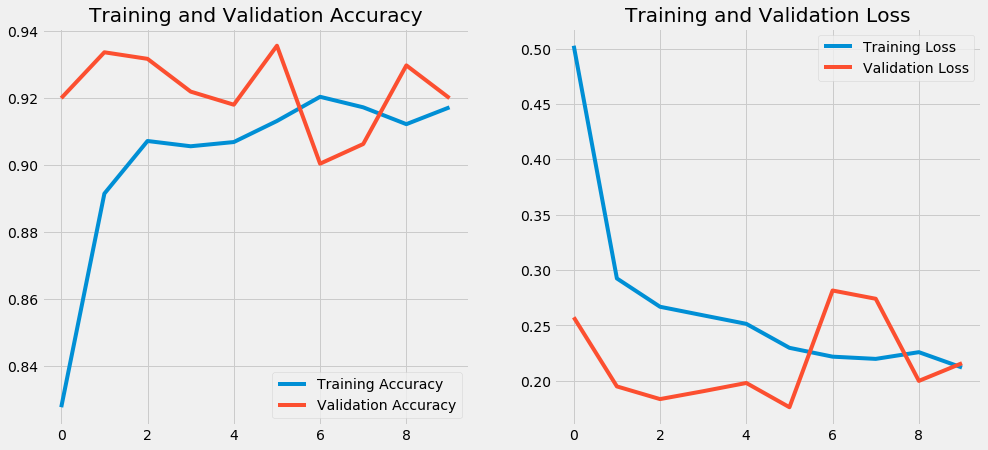

In [34]:
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
preds = None
true_y = None
for i,j in test_img_generator:
    print(len(i))
    print(len(np.round(model.predict(i))))
    preds = np.round(model.predict(i))
    true_y = j
    break
one_class_true_y = [img_class(i) for i in true_y]
print(one_class_true_y[:10])
one_class_preds = [img_class(i) for i in preds]
print(one_class_preds[:10])
print(confusion_matrix(one_class_true_y, one_class_preds))
print(recall_score(one_class_true_y, one_class_preds))
print(accuracy_score(one_class_true_y, one_class_preds))

624
624
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[[218  16]
 [ 32 358]]
0.9179487179487179
0.9230769230769231


In [36]:
base_model.trainable = True

In [37]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=metrics)

In [38]:
EPOCHS = 20
history = model.fit(train_generator,epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,validation_data=valid_generator,validation_steps=VALIDATION_STEPS)
#model.save(MODEL_FILE)

Epoch 1/20
200/200 [==============================] - 44s 213ms/step - loss: 0.1889 - recall: 0.9269 - accuracy: 0.0513 - val_loss: 0.1314 - val_recall: 0.9492 - val_accuracy: 0.0488
Epoch 2/20
200/200 [==============================] - 43s 213ms/step - loss: 0.1092 - recall: 0.9574 - accuracy: 0.1246 - val_loss: 0.1433 - val_recall: 0.9492 - val_accuracy: 0.0752
Epoch 3/20
200/200 [==============================] - 43s 215ms/step - loss: 0.1045 - recall: 0.9643 - accuracy: 0.1335 - val_loss: 0.2051 - val_recall: 0.9219 - val_accuracy: 0.1064
Epoch 4/20
200/200 [==============================] - 43s 213ms/step - loss: 0.1006 - recall: 0.9644 - accuracy: 0.1624 - val_loss: 0.1816 - val_recall: 0.9375 - val_accuracy: 0.1982
Epoch 5/20
200/200 [==============================] - 42s 212ms/step - loss: 0.0683 - recall: 0.9796 - accuracy: 0.1917 - val_loss: 0.1336 - val_recall: 0.9434 - val_accuracy: 0.2852
Epoch 6/20
200/200 [==============================] - 42s 210ms/step - loss: 0.0687 -

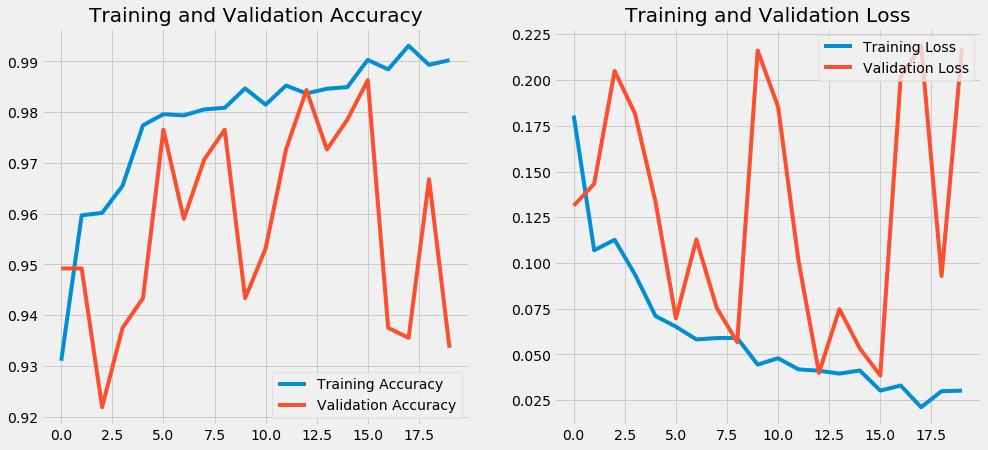

In [39]:
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
model

In [40]:
preds = None
true_y = None
for i,j in test_img_generator:
    print(len(i))
    print(len(np.round(model.predict(i))))
    preds = np.round(model.predict(i))
    true_y = j
    break
one_class_true_y = [img_class(i) for i in true_y]
print(one_class_true_y[:10])
one_class_preds = [img_class(i) for i in preds]
print(one_class_preds[:10])
print(confusion_matrix(one_class_true_y, one_class_preds))
print(recall_score(one_class_true_y, one_class_preds))
print(accuracy_score(one_class_true_y, one_class_preds))

624
624
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
[[231   3]
 [ 14 376]]
0.9641025641025641
0.9727564102564102


In [68]:
#model.evaluate(test_img_generator, batch_size=16, verbose=2)

In [32]:
new_model = Sequential()

In [33]:
new_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_HEIGHT,3)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
new_model.add(MaxPool2D(pool_size=(2,2)))
new_model.add(Dropout(0.15))
new_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
new_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
new_model.add(MaxPool2D(pool_size=(2,2)))
new_model.add(Dropout(0.15))
new_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
new_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
new_model.add(MaxPool2D(pool_size=(2,2)))
new_model.add(Dropout(0.15))
new_model.add(Flatten())
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.15))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.15))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(2,activation='softmax'))

In [34]:
metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Accuracy()]
new_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=metrics)

/home/ekostrov/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
EPOCHS = 30
STEPS_PER_EPOCH = 128
VALIDATION_STEPS = 64
history = new_model.fit(train_generator,epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,validation_data=valid_generator,validation_steps=VALIDATION_STEPS)

Epoch 1/30


/home/ekostrov/anaconda3/lib/python3.8/site-packages/keras/backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


128/128 [==============================] - 231s 2s/step - loss: 0.6931 - recall: 0.7217 - accuracy: 0.0000e+00 - val_loss: 0.5776 - val_recall: 0.7500 - val_accuracy: 0.0000e+00
Epoch 2/30
128/128 [==============================] - 226s 2s/step - loss: 0.5433 - recall: 0.7623 - accuracy: 0.0000e+00 - val_loss: 0.5267 - val_recall: 0.7324 - val_accuracy: 0.0000e+00
Epoch 3/30
101/128 [======================>.......] - ETA: 44s - loss: 0.5173 - recall: 0.7698 - accuracy: 0.0000e+00

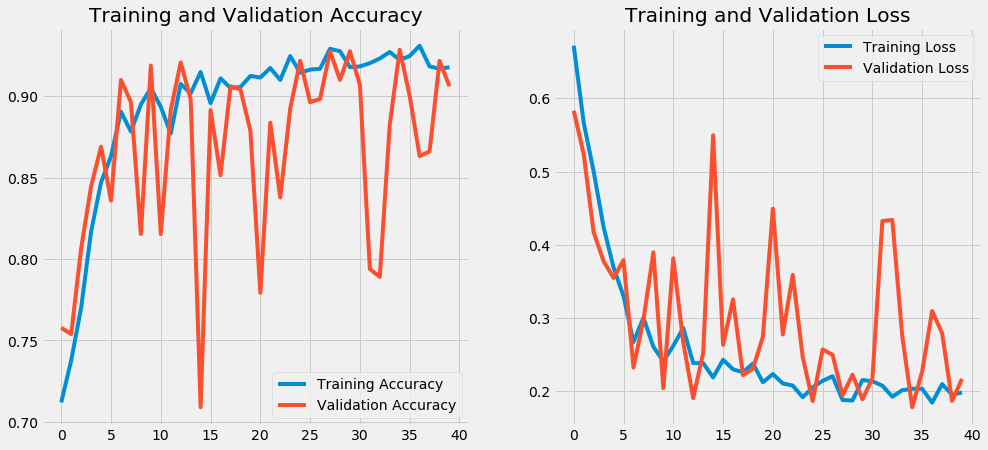

In [53]:
acc = history.history['recall_2']
val_acc = history.history['val_recall_2']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
preds = None
true_y = None
for i,j in test_img_generator:
    #print(len(i))
    #print(len(np.round(new_model.predict(i))))
    preds = np.round(new_model.predict(i))
    true_y = j
    break
one_class_true_y = [img_class(i) for i in true_y]
print(one_class_true_y[:10])
one_class_preds = [img_class(i) for i in preds]
print(one_class_preds[:10])
print(confusion_matrix(one_class_true_y, one_class_preds))
print(recall_score(one_class_true_y, one_class_preds))
print(accuracy_score(one_class_true_y, one_class_preds))

624
624
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
[[198  36]
 [ 24 366]]
0.9384615384615385
0.9038461538461539


In [55]:
preds

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [64]:
preds = None
true_y = None
for i,j in test_img_generator:
    #print(len(i))
    #print(len(np.round(new_model.predict(i))))
    #preds = np.round(new_model.predict(i))
    preds = new_model.predict(i)
    true_y = j
    break
one_class_true_y = [img_class(i) for i in true_y]
print(one_class_true_y[:10])
one_class_preds = [img_class(i) for i in preds]
print(one_class_preds[:10])

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [65]:
preds

array([[9.7893405e-01, 2.1065988e-02],
       [9.3304300e-01, 6.6956960e-02],
       [9.6280390e-01, 3.7196096e-02],
       ...,
       [1.2250808e-03, 9.9877495e-01],
       [3.0168181e-02, 9.6983182e-01],
       [6.1253515e-05, 9.9993873e-01]], dtype=float32)

In [73]:
def img_class_thresh(cl, thresh):
    if cl[0] > thresh:
        return 0
    else:
        return 1

In [92]:
preds = None
true_y = None
for i,j in test_img_generator:
    #print(len(i))
    #print(len(np.round(new_model.predict(i))))
    preds = new_model.predict(i)
    true_y = j
    break
one_class_true_y = [img_class(i) for i in true_y]
print(one_class_true_y[:10])
one_class_preds = [img_class(i) for i in preds]
print(one_class_preds[:10])
print(confusion_matrix(one_class_true_y, one_class_preds))
print(recall_score(one_class_true_y, one_class_preds))
print(accuracy_score(one_class_true_y, one_class_preds))

[0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
[[198  36]
 [ 24 366]]
0.9384615384615385
0.9038461538461539
